In [1]:
%load_ext autoreload

%autoreload 2
import sys
sys.path.append("..") 
import numpy as np
from stdogvis.main import StDoGClient

In [2]:
np.sort()

TypeError: _sort_dispatcher() missing 1 required positional argument: 'a'

In [5]:
sio = StDoGClient()
sio.external('http://localhost:5000')
sio.renderMyImg( transparency=True)

{'state': 'success', 'msg': "You're inside pyObj room"}
{'state': 'success', 'asked to protagonist webclient': 'msg'}
recived img
recived img


Exception in thread Thread-16:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "/home/devmessias/envs/jupyter/lib/python3.7/site-packages/socketio/client.py", line 616, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/home/devmessias/envs/jupyter/lib/python3.7/site-packages/socketio/client.py", line 500, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/home/devmessias/envs/jupyter/lib/python3.7/site-packages/socketio/client.py", line 555, in _trigger_event
    event, *args)
  File "/home/devmessias/envs/jupyter/lib/python3.7/site-packages/socketio/namespace.py", line 18, in trigger_event
    return getattr(self, handler_name)(*args)
  File "../stdogvis/main.py", line 82, in on_reciveRenderedImg
    self.client.storeImg(data['imgU

In [4]:
sio.imgURI

{}

In [9]:

sio.getImg()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [25]:
import igraph as ig
n=1000
g = ig.Graph.Barabasi(n, 3)


In [26]:
coords = g.layout_fruchterman_reingold_3d(niter = 100)

In [27]:
sio.sendGraph(g)

{'state': 'success', 'msg': 'graph recived'}


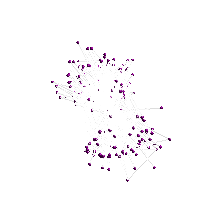

{'state': 'success', 'asked to protagonist webclient': 'msg'}
recived img
recived img
recived img
{'state': 'success', 'msg': "You're inside pyObj room"}
{'state': 'success', 'msg': "You're inside pyObj room"}
{'state': 'success', 'msg': "You're inside pyObj room"}


In [30]:
sio.renderMyImg( transparency=True)
sio.getImg()

packet queue is empty, aborting
packet queue is empty, aborting


{'state': 'success', 'msg': "You're inside pyObj room"}
{'state': 'success', 'msg': "You're inside pyObj room"}


In [17]:
g.vs["pos"] = coords

In [21]:
g.vs[0]["pos"]

[-7.361609085023319, 14.079096692133472, 6.661571183801742]

{'state': 'success', 'msg': "You're inside pyObj room"}
{'state': 'success', 'msg': "You're inside pyObj room"}


In [22]:
print(dir(g.es[0]))

['__class__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'attribute_names', 'attributes', 'count_multiple', 'delete', 'graph', 'index', 'is_loop', 'is_multiple', 'is_mutual', 'source', 'source_vertex', 'target', 'target_vertex', 'tuple', 'update_attributes', 'vertex_tuple']


In [52]:
g.es[0]["value"]

1.0

In [13]:
import numpy as np
import igraph as ig
State = {}


In [10]:
import pickle
State = {}
g = pickle.load(open("../stdogvis/bin/graph.ml", "rb"))

n = g.vcount()
nodes = {}    
defaultProps = g.vs[0].attribute_names()
posInProps = "pos" in defaultProps

if posInProps:
    nodes["pos"] = []
else:
    layout = g.layout_kamada_kawai_3d()
    nodes["pos"] = np.array( layout.coords).flatten().tolist()

    
nodesId = {
    n:n for n in range(n)
}

    
nodes["id"] = nodesId
nodes["props"] = defaultProps
for prop in defaultProps:
    for node in g.vs:
        if prop == "pos":
            for node in g.vs:
                nodes["pos"] += list(n["pos"])
        else:
            nodes[prop] = []
            for node in g.vs:
                nodeInfo = node
                value = nodeInfo[prop] if prop in node.attribute_names() else 0
                nodes[prop].append(value)


edges = {}
defaultEdgeProps = g.es[0].attribute_names()


edges["nodes"] = [[e.source, e.target] for e in g.es]
for prop in defaultEdgeProps:
    edges[prop] = [e[prop] for e in g.es]

edges["props"] = defaultEdgeProps
State["nodes"] = nodes
State["edges"] = edges

State["graphLoaded"] = True
State["numNodes"] = n
State["defaultProps"] = defaultProps
State["defaultEdgeProps"] = defaultEdgeProps




In [36]:
import networkx as nx
nx.read_gml("../../../lesmiserables.gml")

In [37]:
g = ig.read("../../../lesmiserables.gml")

True

In [42]:
g.vs[0]

igraph.Vertex(<igraph.Graph object at 0x7f5d678c8c78>, 0, {'id': 0.0, 'label': 'Myriel'})

22

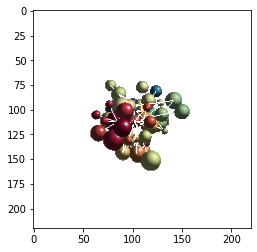

Error: Incorrect padding

In [55]:
def connect(data):
    print(data)
sio.emit("joinRoom",callback=connect, data={"room":"pyObj"})

{'state': 'success', 'msg': "You're inside pyObj room"}


In [135]:
def connect(data):
    print(data)
sio.emit("imTheProtagonist",callback=connect, data={"room":"webClient"})

{'state': 'success', 'msg': ''}


In [11]:
def connect(data):
    print(data)
sio.emit("renderMyImg",callback=connect)

In [87]:
def teste(t):
    print(t)
try:
    loop = asyncio.get_running_loop()
except RuntimeError:  # if cleanup: 'RuntimeError: There is no current event loop..'
    loop = None

if loop and loop.is_running():
    #print('Async event loop already running')
    tsk = loop.create_task(hello())
    tsk.add_done_callback(teste)  # optional (using py38)
else:
    print('Starting new event loop')
    asyncio.run(main())


<Task finished coro=<hello() done, defined at <ipython-input-79-3bd577214078>:1> result='{"type": "info", "count": 1}'>


In [75]:
    
print(imgURI)

{"type": "info", "count": 1}
